<a href="https://colab.research.google.com/github/byambaa1982/CodingWorkshops/blob/master/event_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Read data here. Upload data in same directory. 


In [0]:
data = pd.read_csv('/billieconcert.csv')

## See how many columns and rows here

In [4]:
data.shape

(910, 9)

## Just see the first five rows

In [0]:
data.head()

,Event,Venue,Event date,Zone,Section,Price,Row,Qty,Date sold
0,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,B Center,617.81,S,4,2019/02/05 10:09:33
1,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,Reserve C Sides,345.77,V,2,2019/02/05 09:30:39
2,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,Reserve A Center,459.87,Q,3,2019/02/07 21:45:23
3,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,Reserve B Center,218.29,K,2,2019/02/07 21:29:08
4,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,Benches,114.75,C,2,2019/02/07 20:31:02


## We need only "Section", "Price" and  "Date sold" features. 
## Let's make a new dataframe on those

In [0]:
df =data[4:]

In [0]:
df=data[['Section', 'Price', 'Date sold']]

In [8]:
df.head()

,Section,Price,Date sold
0,B Center,617.81,2019/02/05 10:09:33
1,Reserve C Sides,345.77,2019/02/05 09:30:39
2,Reserve A Center,459.87,2019/02/07 21:45:23
3,Reserve B Center,218.29,2019/02/07 21:29:08
4,Benches,114.75,2019/02/07 20:31:02


## Split "Date sold" into "date" and "time"

In [9]:
df['splitted']=df[df.columns[2]].map(lambda x:x.split(' '))
df['date']=df['splitted'].map(lambda x:x[0])
df['time']=df['splitted'].map(lambda x:x[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

## Let's see our new dataframe

In [11]:
df.head()

,Section,Price,Date sold,splitted,date,time
0,B Center,617.81,2019/02/05 10:09:33,"[2019/02/05, 10:09:33]",2019/02/05,10:09:33
1,Reserve C Sides,345.77,2019/02/05 09:30:39,"[2019/02/05, 09:30:39]",2019/02/05,09:30:39
2,Reserve A Center,459.87,2019/02/07 21:45:23,"[2019/02/07, 21:45:23]",2019/02/07,21:45:23
3,Reserve B Center,218.29,2019/02/07 21:29:08,"[2019/02/07, 21:29:08]",2019/02/07,21:29:08
4,Benches,114.75,2019/02/07 20:31:02,"[2019/02/07, 20:31:02]",2019/02/07,20:31:02


## What sections in the venue did the best in terms of sales?
## Let's groupby "Section" and sort it by price values

In [0]:
df_sec=df.groupby(['Section']).sum()

In [15]:
df_sec.sort_values(by='Price', ascending=False)

,Price
Section,
Terrace,42761.17
Reserve A Sides,41561.58
Reserve B Center,39446.88
Reserve A Center,30562.42
Reserve B Sides,26872.98
Reserve C Sides,26066.73
Pit General Admission,23143.76
Reserve C Center,15798.00
Benches,10110.10


In [0]:
def barplot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title, fontsize=15, pad=30)
    plt.xticks(x_data, labels=x_data, rotation='vertical')

#Bar plots are most effective when you are trying to visualize categorical data that has few (probably < 10) categories. If we have too many categories then the bars will be very cluttered in the figure and hard to understand.

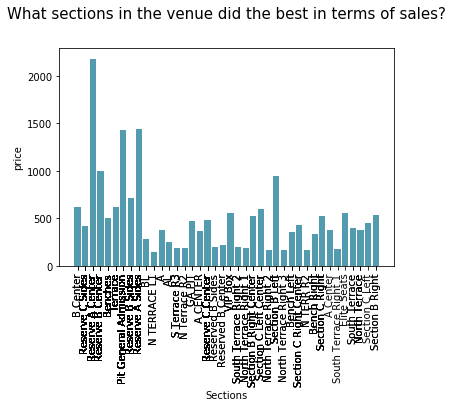

In [55]:
barplot(df.Section, df.Price, x_label="Sections", y_label="price", title="What sections in the venue did the best in terms of sales?" )

## Top ten sections

In [0]:
viz=df_sec.sort_values(by='Price', ascending=False)
viz=viz.head(10)

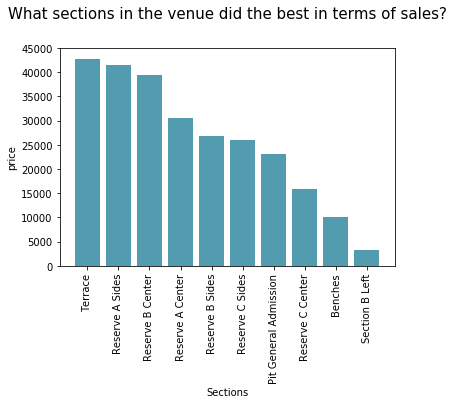

In [57]:
barplot(viz.index, viz.Price, x_label="Sections", y_label="price", title="What sections in the venue did the best in terms of sales?" )

##  When was the best time to sell the tickets?

## Let's groupby "Date" and sort it by price values

In [16]:
df_date=df.groupby(['date']).sum()
df_date.sort_values(by='Price', ascending=False)

,Price
date,
2019/02/08,37978.45
2019/02/07,15531.76
2019/07/10,13277.63
2019/07/09,10880.53
2019/02/09,7495.97
2019/07/08,6963.46
2019/07/03,4945.90
2019/06/24,4758.68
2019/05/07,4144.45


## Top 10 dates

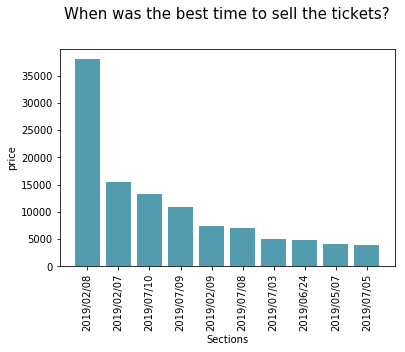

In [58]:
viz_date=df_date.sort_values(by='Price', ascending=False)
viz_date=viz_date.head(10)
barplot(viz_date.index, viz_date.Price, x_label="Sections", y_label="price", title="When was the best time to sell the tickets?" )

## Top 15 dates

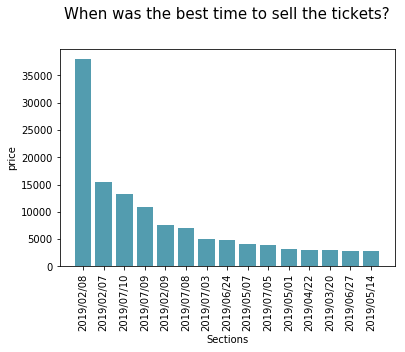

In [59]:
viz_date=df_date.sort_values(by='Price', ascending=False)
viz_date=viz_date.head(15)
barplot(viz_date.index, viz_date.Price, x_label="Sections", y_label="price", title="When was the best time to sell the tickets?" )

In [0]:
def groupedbarplot(x_data, y_data_list, colors, y_data_names="", x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Total width for all bars at one x location
    total_width = 0.8
    # Width of each individual bar
    ind_width = total_width / len(y_data_list)
    # This centers each cluster of bars about the x tick mark
    alteration = np.arange(-(total_width/2), total_width/2, ind_width)

    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        # Move the bar to the right on the x-axis so it doesn't
        # overlap with previously drawn ones
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

In [0]:
groupedbarplot(df.Price, df.date, colors=df.Section, y_data_names="", x_label="", y_label="", title="")